<a href="https://colab.research.google.com/github/sreeaishwar/multi_label_Movie_Genre_Prediction_using_CNN/blob/main/CNN_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
!python -m pip install keras-rl2

In [31]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation,ZeroPadding2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
#from kerastuner.tuners import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters
from keras.preprocessing.image import ImageDataGenerator

In [32]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [35]:
hgt=300
wdt=300

In [36]:
dataset = pd.read_csv("/content/Movies-Poster_Dataset/train.csv")
dataset.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
X_Imagelist=[]

In [38]:
for i in tqdm(range(dataset.shape[0])):
  path = "/content/Movies-Poster_Dataset/Images/"+dataset["Id"][i]+".jpg"
  img = image.load_img(path,target_size=(hgt,wdt,3))
  img = image.img_to_array(img)
  img=img/255.0
  X_Imagelist.append(img)
X=np.array(X_Imagelist)

100%|██████████| 7254/7254 [00:21<00:00, 330.34it/s]


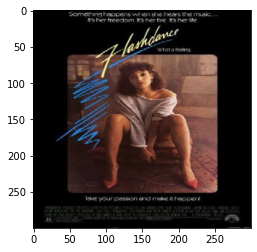

In [39]:
plt.imshow(X[1])

In [40]:
X.shape,dataset.shape

((7254, 300, 300, 3), (7254, 27))

In [41]:
y = dataset.drop(["Id","Genre"],axis=1)
y=y.to_numpy()

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.15)

In [43]:
X_train.shape,X_test.shape

((6165, 300, 300, 3), (1089, 300, 300, 3))

In [44]:
model = tf.keras.models.Sequential()
model.add(Conv2D(input_shape=X_train[0].shape, filters = 16, kernel_size = (3,3), strides = (1,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(units = 32, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Dense(units = 25, activation = 'sigmoid'))

model.compile(optimizer="adam" , loss="binary_crossentropy", metrics=[keras.metrics.BinaryAccuracy()])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 298, 298, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 298, 298, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 147, 147, 32)      1

In [46]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
#(X_train, y_train, batch_size = 50, validation_split = , epochs = 80, verbose = 1)
#model.fit(datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train) / 32, epochs=100)

Epoch 1/50
193/193 [==============================] - 128s 643ms/step - loss: 0.5151 - binary_accuracy: 0.6336 - val_loss: 0.3261 - val_binary_accuracy: 0.7713
Epoch 2/50
193/193 [==============================] - 123s 639ms/step - loss: 0.2556 - binary_accuracy: 0.8164 - val_loss: 0.2470 - val_binary_accuracy: 0.8424
Epoch 3/50
193/193 [==============================] - 123s 637ms/step - loss: 0.2436 - binary_accuracy: 0.8558 - val_loss: 0.2456 - val_binary_accuracy: 0.8657
Epoch 4/50
193/193 [==============================] - 124s 644ms/step - loss: 0.2375 - binary_accuracy: 0.8723 - val_loss: 0.2439 - val_binary_accuracy: 0.8776
Epoch 5/50
193/193 [==============================] - 125s 646ms/step - loss: 0.2343 - binary_accuracy: 0.8815 - val_loss: 0.2396 - val_binary_accuracy: 0.8848
Epoch 6/50
193/193 [==============================] - 124s 644ms/step - loss: 0.2305 - binary_accuracy: 0.8875 - val_loss: 0.2373 - val_binary_accuracy: 0.8897
Epoch 7/50
193/193 [====================

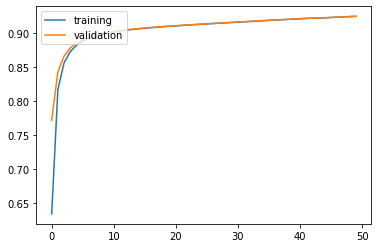

In [48]:
plt.plot(history.history['binary_accuracy']) # newer versions plt.plot(history.history['accuracy'])
plt.plot(history.history['val_binary_accuracy']) # newer versions plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Action
Crime


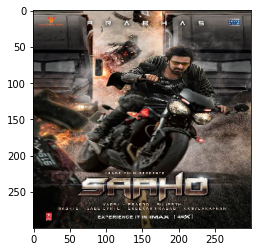

In [53]:
img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg', target_size=(hgt, wdt, 3))
#img = image.load_img('/content/cher.jpg', target_size=(hgt, wdt, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, hgt, wdt, 3)
classes = dataset.columns[2:]
print(classes)
Y_prob = model.predict(img)
top3 = np.argsort(Y_prob[0])[:-4 :-1]
for i in range(3):
  print(classes[top3[i]])


**Using Transfer Learning**

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [ ]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=X_train[0].shape,
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = tf.keras.Input(shape=(300, 300, 3))
x = data_augmentation(inputs)

In [ ]:
# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])

In [ ]:
# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
outputs = tf.keras.layers.Dense(25,activation = 'sigmoid')(x)
model = keras.Model(inputs, outputs)

model.summary()

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    # loss=keras.losses.BinaryCrossentropy(from_logits=True),
    loss="binary_crossentropy",
    metrics=[keras.metrics.BinaryAccuracy()],
    # metrics=["accuracy"]
)
model.fit(X_train,y_train, epochs=20, validation_data=(X_test, y_test))

In [ ]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(),  # Low learning rate
    # loss=keras.losses.BinaryCrossentropy(from_logits=True),
    loss="binary_crossentropy",
    metrics=[keras.metrics.BinaryAccuracy()],
    # metrics=["accuracy"]
)

history = model.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
plt.plot(history.history['binary_accuracy']) # newer versions plt.plot(history.history['accuracy'])
plt.plot(history.history['val_binary_accuracy']) # newer versions plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg', target_size=(hgt, wdt, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, hgt, wdt, 3)
classes = dataset.columns[2:]
print(classes)
Y_prob = model.predict(img)
top3 = np.argsort(Y_prob[0])[:-4 :-1]
for i in range(3):
  print(classes[top3[i]])